In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [40]:
data=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [41]:
data['Region']=0
#Marking region above 122 as 0 and below 123 and onwards as 1
data.iloc[124:,-1:]=1
data.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [42]:
data.drop(index=[122,123],inplace=True)
# We need to drop the row numbered 122,123
data=data.reset_index(drop=True) #This is an essential step to reset index after dropping rows
data.iloc[120:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [43]:
#We need to reduce the spaces 
data.columns=data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [44]:
data['Classes'].unique()
#We need to remove unnecessary spaces in columns like this in all possible columns

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [45]:
data['Classes']=data['Classes'].str.strip()
data['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [46]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [47]:
mode=data['Classes'].mode()[0]
data['Classes']=data['Classes'].fillna(mode)

In [48]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [50]:
data.iloc[150:190,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
150,29,06,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,fire,1
151,30,06,2012,34,42,15,1.7,79.7,12,8.5,2.2,11.5,2.2,not fire,1
152,01,07,2012,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,not fire,1
153,02,07,2012,33,48,16,0,87.6,7.9,17.8,6.8,7.8,6.4,fire,1
154,03,07,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,fire,1
155,04,07,2012,34,58,18,0,88,13.6,36.8,8,14.1,9.9,fire,1
156,05,07,2012,34,45,18,0,90.5,18.7,46.4,11.3,18.7,15,fire,1
157,06,07,2012,35,42,15,0.3,84.7,15.5,45.1,4.3,16.7,6.3,fire,1
158,07,07,2012,38,43,13,0.5,85,13,35.4,4.1,13.7,5.2,fire,1
159,08,07,2012,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,fire,1


In [51]:
data['DC']=data['DC'].str.replace(" ","")
data.iloc[150:190,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
150,29,06,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,fire,1
151,30,06,2012,34,42,15,1.7,79.7,12,8.5,2.2,11.5,2.2,not fire,1
152,01,07,2012,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,not fire,1
153,02,07,2012,33,48,16,0,87.6,7.9,17.8,6.8,7.8,6.4,fire,1
154,03,07,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,fire,1
155,04,07,2012,34,58,18,0,88,13.6,36.8,8,14.1,9.9,fire,1
156,05,07,2012,34,45,18,0,90.5,18.7,46.4,11.3,18.7,15,fire,1
157,06,07,2012,35,42,15,0.3,84.7,15.5,45.1,4.3,16.7,6.3,fire,1
158,07,07,2012,38,43,13,0.5,85,13,35.4,4.1,13.7,5.2,fire,1
159,08,07,2012,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,fire,1


In [52]:
#Now label fire and not fire as 1 and 0 
data['Classes']=data['Classes'].map({'fire':1,'not fire':0})
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,0,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [53]:
data.drop(index=165,inplace=True)
data=data.reset_index(drop=True)
#To maintain the index in order even if some rows are dropped
data.iloc[150:190,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
150,29,06,2012,37,36,13,0.6,86.2,17.9,36.7,4.8,17.8,7.2,1,1
151,30,06,2012,34,42,15,1.7,79.7,12,8.5,2.2,11.5,2.2,0,1
152,01,07,2012,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,0,1
153,02,07,2012,33,48,16,0,87.6,7.9,17.8,6.8,7.8,6.4,1,1
154,03,07,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,1,1
155,04,07,2012,34,58,18,0,88,13.6,36.8,8,14.1,9.9,1,1
156,05,07,2012,34,45,18,0,90.5,18.7,46.4,11.3,18.7,15,1,1
157,06,07,2012,35,42,15,0.3,84.7,15.5,45.1,4.3,16.7,6.3,1,1
158,07,07,2012,38,43,13,0.5,85,13,35.4,4.1,13.7,5.2,1,1
159,08,07,2012,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,1,1


In [54]:
columns=data.columns
data[['day', 'month', 'year']]=data[['day', 'month', 'year']].astype(int)
for column in columns:
    if data[column].dtypes=='O':
        if column!='Classes':
            data[column]=data[column].astype(float)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(10), int32(3), int64(2)
memory usage: 25.8 KB


### Exploratory Data Analysis(EDA)

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data_copy=data.drop(['day','month','year'],axis=1)
data_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


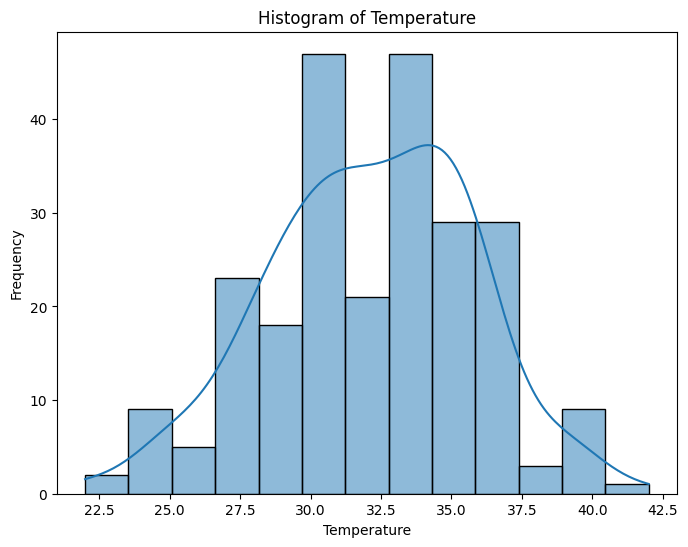

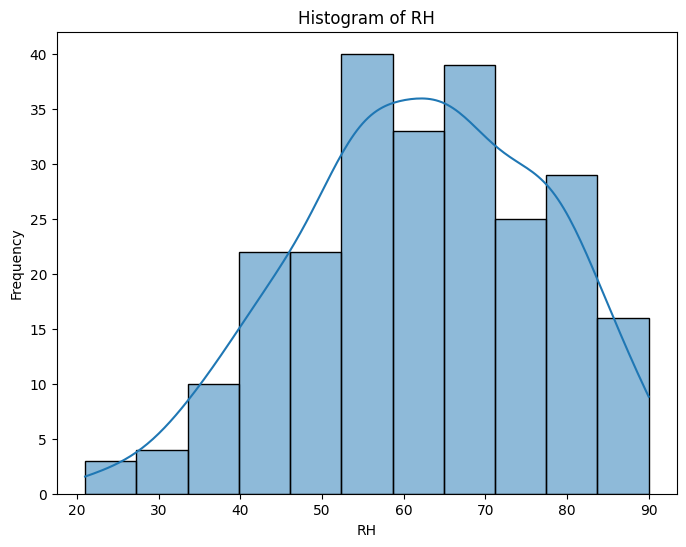

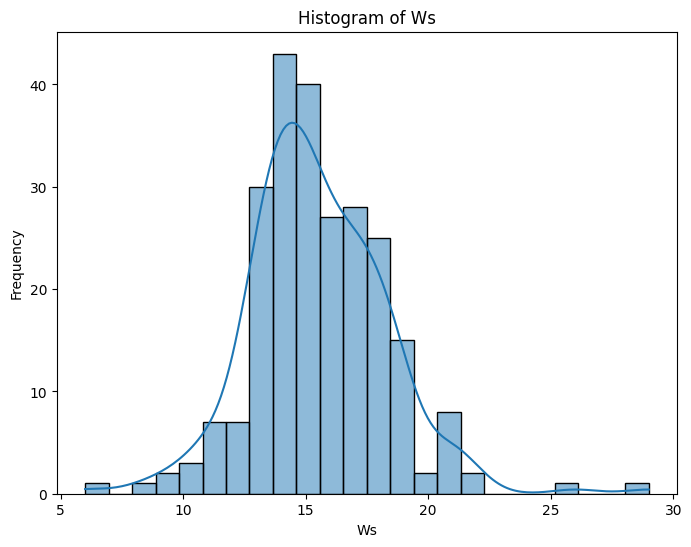

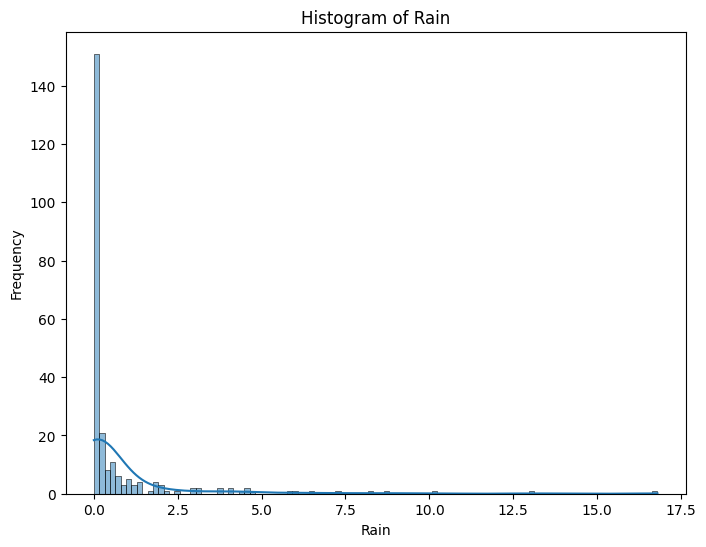

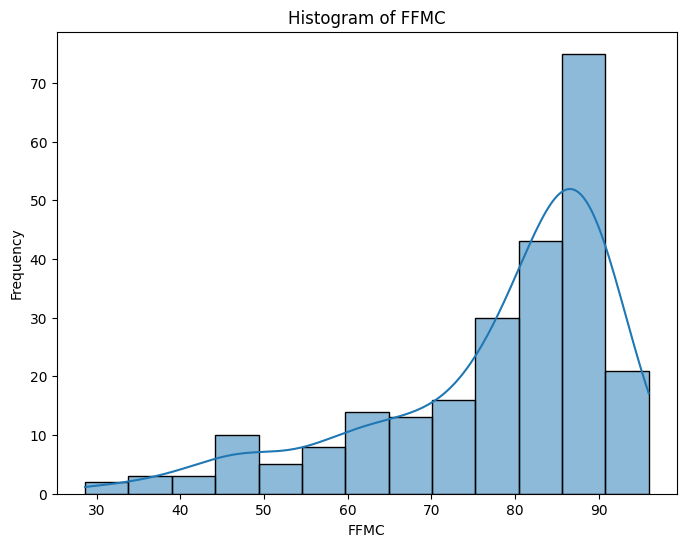

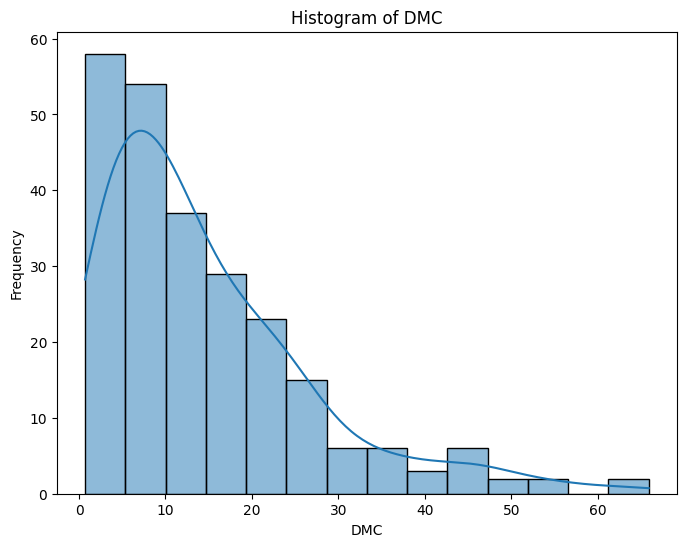

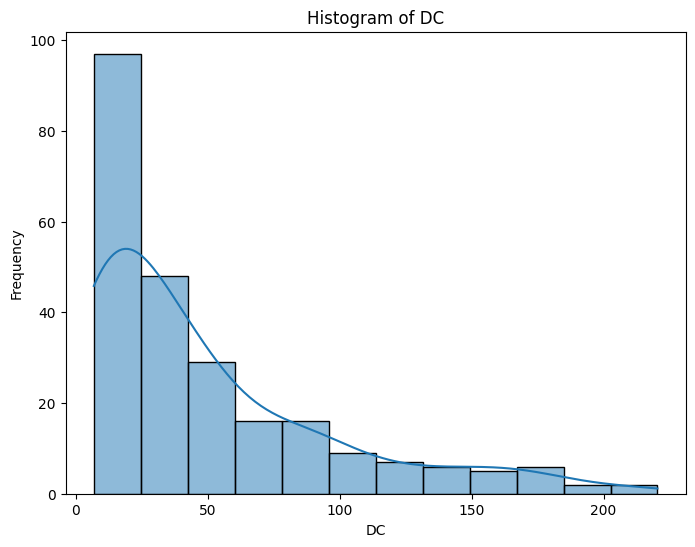

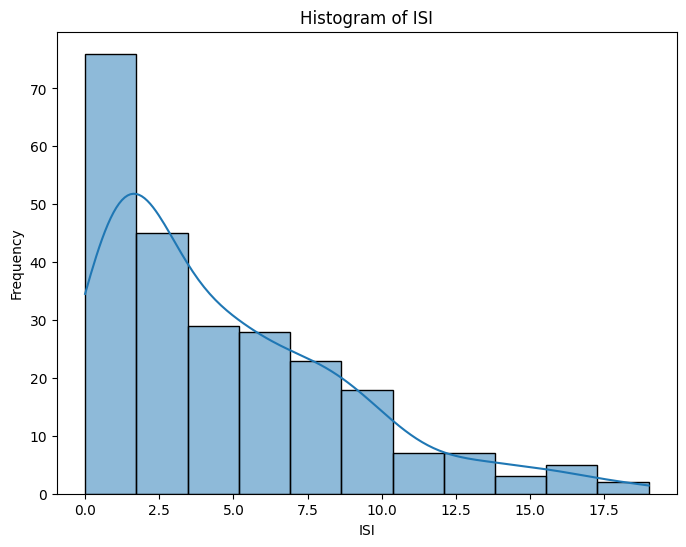

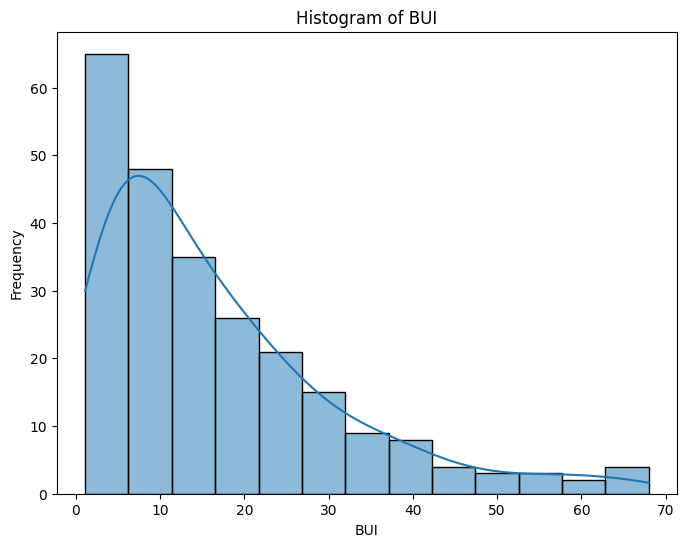

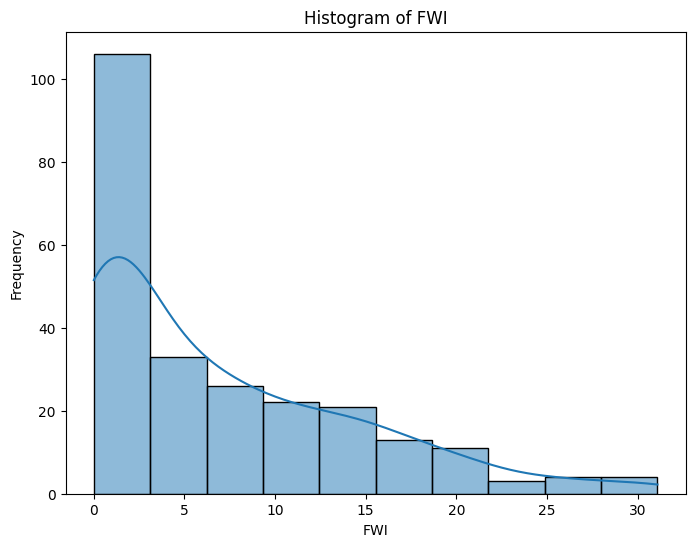

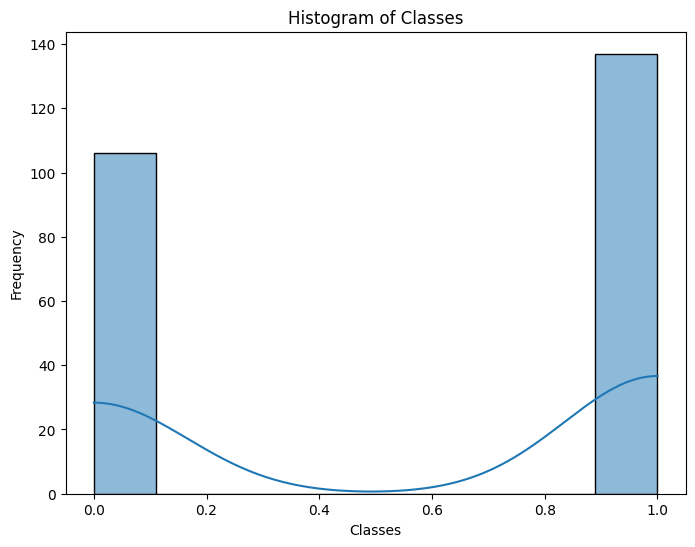

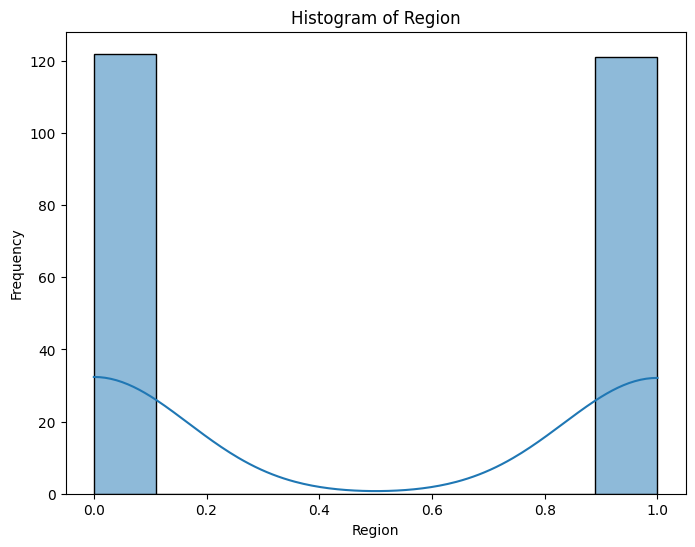

In [58]:
for column in data_copy.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_copy[column], kde=True)  # Histogram with KDE
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
#we need to select those columns with float or int data type

In [59]:
data_copy.corr()
#correlation between independent and dependent features

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


### Ridge and Lasso Regression

In [60]:
#Compute FWI from all independent features except month,day,year
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [61]:
X=data.drop(['month','day','year','FWI'],axis=1)
y=data[['FWI']]


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29.0,74.0,19.0,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31.0,72.0,14.0,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40.0,31.0,15.0,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32.0,60.0,18.0,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32.0,47.0,14.0,0.7,77.5,7.1,8.8,1.8,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24.0,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28.0,80.0,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25.0,76.0,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,19.5,1,1


### Check for multicollinearity
When independent features are highly correlated with one another so we can remove some of them 

In [63]:
X_train.corr()
#data.corr() returns a pandas DataFrame only 
#Check for multicollineairy before scaling because we will need the datframe for finding out the highly correlated features ,sacling will convert it into np 2d array

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [64]:
def correlation(dataset, threshold):
    corr_matrix = dataset.corr()
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if i!=j and abs(corr_matrix.iloc[i, j]) > threshold:
                feature_name = corr_matrix.columns[i]
                correlated_features.add(feature_name)
                
    return correlated_features

correlated_features=correlation(X_train,0.95)
print(correlated_features)
#Note we will have features in pair out of each pair we need to remove only one feature 
    


{'BUI'}


In [65]:
X_train=X_train.drop(['BUI'],axis=1)
X_test=X_test.drop(['BUI'],axis=1)
#We are dropping this column from both X_train and X_test because this feature is highly correlated with some another feature
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,Classes,Region
97,29.0,74.0,19.0,0.1,75.8,3.6,32.2,2.1,0,0
141,31.0,72.0,14.0,0.2,60.2,3.8,8.0,0.8,0,1
192,40.0,31.0,15.0,0.0,94.2,22.5,46.3,16.6,1,1
68,32.0,60.0,18.0,0.3,77.1,11.3,47.0,2.2,0,0
119,32.0,47.0,14.0,0.7,77.5,7.1,8.8,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...
106,24.0,82.0,15.0,0.4,44.9,0.9,7.3,0.2,0,0
14,28.0,80.0,17.0,3.1,49.4,3.0,7.4,0.4,0,0
92,25.0,76.0,17.0,7.2,46.0,1.3,7.5,0.2,0,0
179,34.0,59.0,16.0,0.0,88.1,19.5,47.2,7.4,1,1


In [66]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

The r2 score for linear regression is  0.9830565611009445


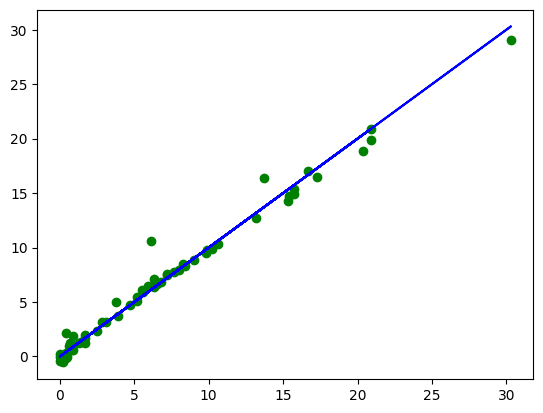

In [68]:
#LINEAR REGRESSION
regression_model_1=LinearRegression()
regression_model_1.fit(X_train,y_train)
y_pred_1=regression_model_1.predict(X_test)
r2=r2_score(y_test,y_pred_1)
plt.scatter(y_test,y_pred_1,c='g')
plt.plot(y_test,y_test,'b')
print("The r2 score for linear regression is ",r2)

The r2 score for ridge regression is  0.9824051915524249


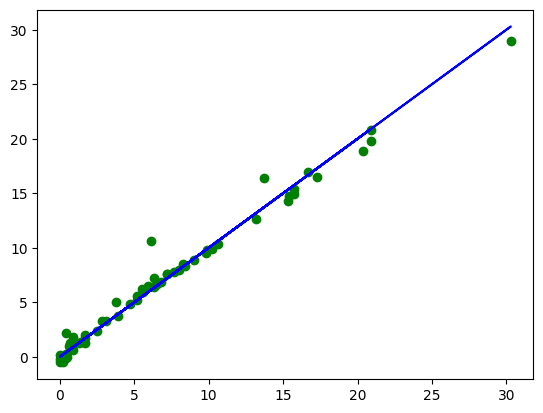

In [69]:
#RIDGE REGRESSION
regression_model_2=Ridge()
regression_model_2.fit(X_train,y_train)
y_pred_2=regression_model_2.predict(X_test)
r2=r2_score(y_test,y_pred_2)
plt.scatter(y_test,y_pred_2,c='g')
plt.plot(y_test,y_test,'b')
print("The r2 score for ridge regression is ",r2)

The r2 score for lasso regression is  0.9498931628519822


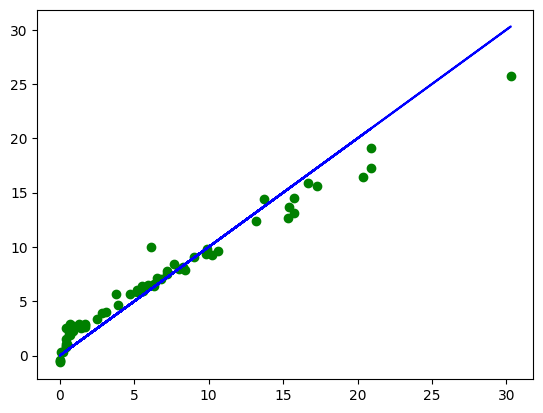

In [70]:
#LASSO REGRESSION
regression_model_3=Lasso()
regression_model_3.fit(X_train,y_train)
y_pred_3=regression_model_3.predict(X_test)
r2=r2_score(y_test,y_pred_3)
plt.scatter(y_test,y_pred_3,c='g')
plt.plot(y_test,y_test,'b')
print("The r2 score for lasso regression is ",r2)

The r2 score for elastic net regression is  0.8887824924177792


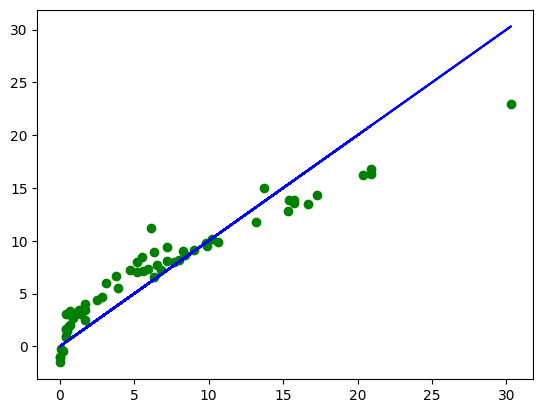

In [71]:
#Elastic-Net REGRESSION
regression_model_4=ElasticNet()
regression_model_4.fit(X_train,y_train)
y_pred_4=regression_model_4.predict(X_test)
r2=r2_score(y_test,y_pred_4)
plt.scatter(y_test,y_pred_4,c='g')
plt.plot(y_test,y_test,'b')
print("The r2 score for elastic net regression is ",r2)

### Hyperparamter Tuning

The r2 score for lasso regression with cv is  0.9812242879221943


c:\Users\mahap\OneDrive\Desktop\C++,JS python codes\.vscode\ML-DL-NLP\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


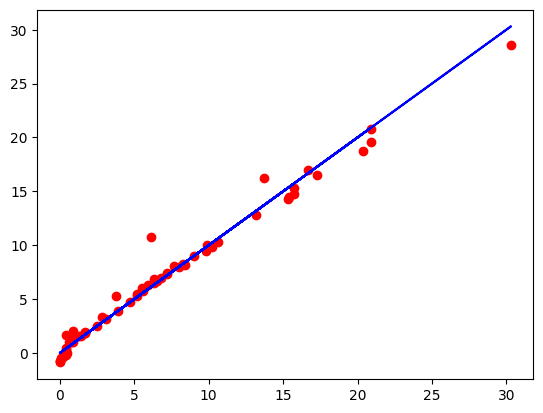

In [72]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
#Cross Validation available for both ridge and lasso regression 
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
pred=lassocv.predict(X_test)
print("The r2 score for lasso regression with cv is ",r2_score(y_test,pred))
plt.scatter(y_test,pred,c='r')
plt.plot(y_test,y_test,'b')

In [73]:
lassocv.alpha_

0.05725391318234408

The r2 score for ridge regression with cv is  0.9824051915524249


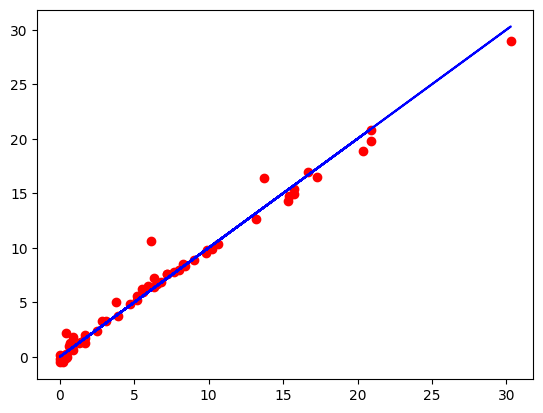

In [74]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train,y_train)
prediction=ridgecv.predict(X_test)
print("The r2 score for ridge regression with cv is ",r2_score(y_test,prediction))
plt.scatter(y_test,prediction,c='r')
plt.plot(y_test,y_test,'b')

In [75]:
ridgecv.alpha_

1.0

In [76]:
#Convert the ridgecv model into pickle file as it provides accuracy of 0.9824051915524249
import pickle
with open('algerian_forest_prediction.pkl','wb') as file:
    pickle.dump(ridgecv,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
# with open(file name in string,mode in string)as file:
#     pickle.dump(object,file)
                                 